In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,roc_auc_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [35]:
df=pd.read_csv('../input/heart-patients/US_Heart_Patients.csv')
df.describe()
df.isnull().sum()
no_m_v=df.dropna(axis=0)
data_w_d=pd.get_dummies(no_m_v,drop_first=True)
data_w_d.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [36]:
y=data_w_d['TenYearCHD']
x=data_w_d.drop(['TenYearCHD'],axis=1)

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [38]:
models={'Logistic Regression':LogisticRegression(),'KNN':KNeighborsClassifier(),'RandomForest':RandomForestClassifier()}

In [39]:
def fit_and_plot(models,x_train,x_test,y_train,y_test):
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [40]:
scores=fit_and_plot(models,x_train,x_test,y_train,y_test)
scores

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8401639344262295,
 'KNN': 0.8292349726775956,
 'RandomForest': 0.837431693989071}

In [41]:
# We  can see that from three tools above , RandomForestClassifier showed the best result - 85,2% 

In [42]:
train_scores=[]
test_scores=[]

knn=KNeighborsClassifier()

neighbors=range(1,41)

for i in neighbors:
    knn.fit(x_train,y_train)
    knn.set_params(n_neighbors=i)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

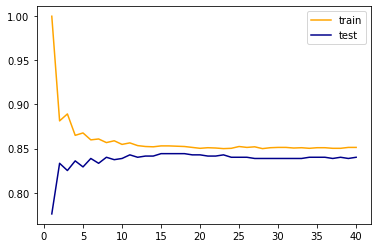

Test maximum score:84.43%


In [43]:
plt.plot(neighbors,train_scores,label='train',color='orange')
plt.plot(neighbors,test_scores,label='test',color='darkblue')
plt.legend()
plt.show()

print(f'Test maximum score:{max(test_scores)*100:.2f}%')

In [44]:
#From the hypertuning of the KNN , we were able to increase KNN score from 82% to 84,84% . But it still lower than
#logistic regression score.
# Now we will hypertune logistic regression and random forest classifier

In [45]:
log_grid={'C':np.logspace(-4,4,20),'solver':['liblinear']}
random_grid={'n_estimators':[50,100,150],'max_depth':[None,5,10],'max_features':['auto','sqrt'],'min_samples_split':[2,4,6],'min_samples_leaf':[1,2,3]}

In [46]:
rs_log_search=RandomizedSearchCV(LogisticRegression(),param_distributions=log_grid,n_iter=5,cv=5,verbose=True)
rs_random_search=RandomizedSearchCV(RandomForestClassifier(),param_distributions=random_grid,n_iter=5,cv=5,verbose=True)

In [47]:
rs_log_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.8s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [48]:
rs_random_search.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    9.9s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [None, 5, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [50, 100, 150]},
                   verbose=True)

In [49]:
print(rs_log_search.score(x_test,y_test))
print(rs_random_search.score(x_test,y_test))

0.8442622950819673
0.8401639344262295
